# Yelp API - Lab


## Introduction 

Now that we've seen how the Yelp API works and some basic Folium visualizations, it's time to put those skills to work in order to create a working map! Taking things a step further, you'll also independently explore how to perform pagination in order to retrieve a full results set from the Yelp API!

## Objectives

You will be able to: 
* Create HTTP requests to get data from Yelp API
* Parse HTTP responses and perform data analysis on the data returned
* Perform pagination to retrieve troves of data!
* Create a simple geographical system on to view information about selected businesses, at a given location. 

## Problem Introduction

You've now worked with some API calls, but we have yet to see how to retrieve a more complete dataset in a programmatic manner. Returning to the Yelp API, the [documentation](https://www.yelp.com/developers/documentation/v3/business_search) also provides us details regarding the API limits. These often include details about the number of requests a user is allowed to make within a specified time limit and the maximum number of results to be returned. In this case, we are told that any request has a maximum of 50 results per request and defaults to 20. Furthermore, any search will be limited to a total of 1000 results. To retrieve all 1000 of these results, we would have to page through the results piece by piece, retrieving 50 at a time. Processes such as these are often referred to as pagination.

In this lab, you will define a search and then paginate over the results to retrieve all of the results. You'll then parse these responses as a DataFrame (for further exploration) and create a map using Folium to visualize the results geographically.

## Part I - Make the Initial Request

Start by making an initial request to the Yelp API. Your search must include at least 2 parameters: **term** and **location**. For example, you might search for pizza restaurants in NYC. The term and location is up to you, but make the request below.

In [1]:
#Your code here
import json

def get_keys(path):
    with open(path) as f:
        return json.load(f)

In [2]:
keys = get_keys('/Users/serenaquiroga/.secret/yelp_api.json')
api_key = keys['api_key']

In [3]:
import requests

In [4]:
url = 'https://api.yelp.com/v3/businesses/search'

headers = {'Authorization': 'Bearer {}'.format(api_key)}

url_params = {
    'term' : 'coffee',
    'location' : 'Tokyo'
}

response = requests.get(url, headers=headers, params=url_params)

In [5]:
print(response)
print(type(response.text))
print(response.text[:1000])

<Response [200]>
<class 'str'>
{"businesses": [{"id": "OEM8Ydd5pN5MIUPGRP2WoQ", "alias": "\u30bf\u30fc\u30ec\u30c3\u30c8-\u30b3\u30fc\u30d2\u30fc-\u4e2d\u592e\u533a", "name": "Turret COFFEE", "image_url": "https://s3-media1.fl.yelpcdn.com/bphoto/JRe0CqT_9EDunHrfM-JAlQ/o.jpg", "is_closed": false, "url": "https://www.yelp.com/biz/%E3%82%BF%E3%83%BC%E3%83%AC%E3%83%83%E3%83%88-%E3%82%B3%E3%83%BC%E3%83%92%E3%83%BC-%E4%B8%AD%E5%A4%AE%E5%8C%BA?adjust_creative=E37aE5Ghxnb-cYUz-6vgYg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=E37aE5Ghxnb-cYUz-6vgYg", "review_count": 88, "categories": [{"alias": "cafes", "title": "Cafes"}, {"alias": "coffee", "title": "Coffee & Tea"}], "rating": 4.5, "coordinates": {"latitude": 35.668022, "longitude": 139.771975}, "transactions": [], "price": "\uffe5", "location": {"address1": "\u7bc9\u57302-12-6", "address2": "SK\u6771\u9280\u5ea7\u30d3\u30eb 1F", "address3": "", "city": "Ch\u016b\u014d", "zip_code": "104-0045", "country": "JP", "stat

## Pagination

Now that you have an initial response, you can examine the contents of the json container. For example, you might start with ```response.json().keys()```. Here, you'll see a key for `'total'`, which tells you the full number of matching results given your query parameters. Write a loop (or ideally a function) which then makes successive API calls using the offset parameter to retrieve all of the results (or 5000 for a particularly large result set) for the original query. As you do this, be mindful of how you store the data. Your final goal will be to reformat the data concerning the businesses themselves into a pandas DataFrame from the json objects.

**Note: be mindful of the API rate limits. You can only make 5000 requests per day, and are also can make requests too fast. Start prototyping small before running a loop that could be faulty. You can also use time.sleep(n) to add delays. For more details see https://www.yelp.com/developers/documentation/v3/rate_limiting.**

In [6]:
import pandas as pd
import time

In [7]:
# Your code here; use a function or loop to retrieve all the results from your original request
response.json().keys()

dict_keys(['businesses', 'total', 'region'])

In [8]:
response.json()['total']

6500

In [9]:
for key in response.json().keys():
    print(key)
    value = response.json()[key]
    print(type(value))
    print('\n\n')

businesses
<class 'list'>



total
<class 'int'>



region
<class 'dict'>





In [10]:
response.json()['region']

{'center': {'longitude': 139.76669311523438, 'latitude': 35.685011526354074}}

In [11]:
response.json()['businesses'][:2]

[{'id': 'OEM8Ydd5pN5MIUPGRP2WoQ',
  'alias': 'ターレット-コーヒー-中央区',
  'name': 'Turret COFFEE',
  'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/JRe0CqT_9EDunHrfM-JAlQ/o.jpg',
  'is_closed': False,
  'url': 'https://www.yelp.com/biz/%E3%82%BF%E3%83%BC%E3%83%AC%E3%83%83%E3%83%88-%E3%82%B3%E3%83%BC%E3%83%92%E3%83%BC-%E4%B8%AD%E5%A4%AE%E5%8C%BA?adjust_creative=E37aE5Ghxnb-cYUz-6vgYg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=E37aE5Ghxnb-cYUz-6vgYg',
  'review_count': 88,
  'categories': [{'alias': 'cafes', 'title': 'Cafes'},
   {'alias': 'coffee', 'title': 'Coffee & Tea'}],
  'rating': 4.5,
  'coordinates': {'latitude': 35.668022, 'longitude': 139.771975},
  'transactions': [],
  'price': '￥',
  'location': {'address1': '築地2-12-6',
   'address2': 'SK東銀座ビル 1F',
   'address3': '',
   'city': 'Chūō',
   'zip_code': '104-0045',
   'country': 'JP',
   'state': '13',
   'display_address': ['築地2-12-6',
    'SK東銀座ビル 1F',
    'Chūō, 東京都 〒104-0045',
    'Japan']},
  'pho

In [12]:
def yelp_call(url_params, api_key):
    url = 'https://api.yelp.com/v3/businesses/search'
    headers = {'Authorization': 'Bearer {}'.format(api_key)}
    response = requests.get(url, headers=headers, params=url_params)
    
    df = pd.DataFrame(response.json()['businesses'])
    return df

def all_results(url_params, api_key):
    num = response.json()['total']
    print('{} total matches found.'.format(num))
    cur = 0
    dfs = []
    while cur < num and cur<1000:
        url_params['offset'] = cur
        dfs.append(yelp_call(url_params, api_key))
        time.sleep(1)
        cur += 50
    df = pd.concat(dfs, ignore_index=True)
    return df

term = 'coffee'
location = "Tokyo"
url_params = {  'term': term.replace(' ', '+'),
                 'location' :location.replace(' ', '+'),
              'limit' : 50
             }
df = all_results(url_params, api_key)
print(len(df))
df.head()

6500 total matches found.
1000


,alias,categories,coordinates,display_phone,distance,id,image_url,is_closed,location,name,phone,price,rating,review_count,transactions,url
0,ターレット-コーヒー-中央区,"[{'alias': 'cafes', 'title': 'Cafes'}, {'alias...","{'latitude': 35.668022, 'longitude': 139.771975}",+81 80-3344-8819,1948.459170,OEM8Ydd5pN5MIUPGRP2WoQ,https://s3-media1.fl.yelpcdn.com/bphoto/JRe0Cq...,False,"{'address1': '築地2-12-6', 'address2': 'SK東銀座ビル ...",Turret COFFEE,+818033448819,￥,4.5,88,[],https://www.yelp.com/biz/%E3%82%BF%E3%83%BC%E3...
1,ヴォルトコーヒー-千代田区,"[{'alias': 'cafes', 'title': 'Cafes'}, {'alias...","{'latitude': 35.7014961242676, 'longitude': 13...",+81 70-6442-9204,1899.283753,lMYPvHGhSb4ZwSG7j6ENtg,https://s3-media2.fl.yelpcdn.com/bphoto/PF7Ot5...,False,"{'address1': '外神田4-5-1', 'address2': '', 'addr...",Vault Coffee,+817064429204,￥,4.5,18,[],https://www.yelp.com/biz/%E3%83%B4%E3%82%A9%E3...
2,glitch-coffee-と-roasters-千代田区-2,"[{'alias': 'cafes', 'title': 'Cafes'}]","{'latitude': 35.6937705070031, 'longitude': 13...",+81 3-5244-5458,1088.733887,cgkLScN8SBHCno1qEfdzbw,https://s3-media4.fl.yelpcdn.com/bphoto/icc8PW...,False,"{'address1': '神田錦町3-16', 'address2': '香村ビル1F',...",GLITCH COFFEE & ROASTERS,+81352445458,￥,4.5,27,[],https://www.yelp.com/biz/glitch-coffee-%E3%81%...
3,sukemasa-coffee-台東区,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...","{'latitude': 35.715242, 'longitude': 139.795394}",+81 3-5830-7763,4244.554947,5aEsWdbcRq1H1-7o40Je5w,https://s3-media4.fl.yelpcdn.com/bphoto/ACzXzs...,False,"{'address1': '浅草2-29-2', 'address2': '君塚ビル102'...",SUKEMASA COFFEE,+81358307763,NaN,5.0,6,[],https://www.yelp.com/biz/sukemasa-coffee-%E5%8...
4,ザ-フレンチトーストファクトリー-ヨドバシakiba店-千代田区,"[{'alias': 'desserts', 'title': 'Desserts'}, {...","{'latitude': 35.69877, 'longitude': 139.774854}",+81 3-3255-1201,1698.137611,1YMvoocxOS2vdFa4FEGyOQ,https://s3-media4.fl.yelpcdn.com/bphoto/YJzl24...,False,"{'address1': '神田花岡町1-1', 'address2': 'ヨドバシAkib...",The French Toast Factory Yodobashi Akiba,+81332551201,￥,4.5,31,[],https://www.yelp.com/biz/%E3%82%B6-%E3%83%95%E...


## Exploratory Analysis

Take the restaurants from the previous question and do an initial exploratory analysis. At minimum, this should include looking at the distribution of features such as price, rating and number of reviews as well as the relations between these dimensions.

In [13]:
#Your code here
df.describe()

,distance,rating,review_count
count,1000.000000,1000.000000,1000.000000
mean,4785.382018,4.388500,6.102000
std,3318.808644,0.507025,11.208891
min,167.732304,2.000000,1.000000
25%,2093.150631,4.000000,1.000000
50%,4322.023271,4.500000,2.500000
75%,6555.372691,5.000000,5.000000
max,36587.003799,5.000000,107.000000


In [14]:
df.columns

Index(['alias', 'categories', 'coordinates', 'display_phone', 'distance', 'id',
       'image_url', 'is_closed', 'location', 'name', 'phone', 'price',
       'rating', 'review_count', 'transactions', 'url'],
      dtype='object')

In [15]:
for col in df.columns:
    print(f'{col} is {type(col)}.')

alias is <class 'str'>.
categories is <class 'str'>.
coordinates is <class 'str'>.
display_phone is <class 'str'>.
distance is <class 'str'>.
id is <class 'str'>.
image_url is <class 'str'>.
is_closed is <class 'str'>.
location is <class 'str'>.
name is <class 'str'>.
phone is <class 'str'>.
price is <class 'str'>.
rating is <class 'str'>.
review_count is <class 'str'>.
transactions is <class 'str'>.
url is <class 'str'>.


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/nonparametric/bandwidths.py:20: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)
/anaconda3/envs/learn-env/lib/python3.6/si

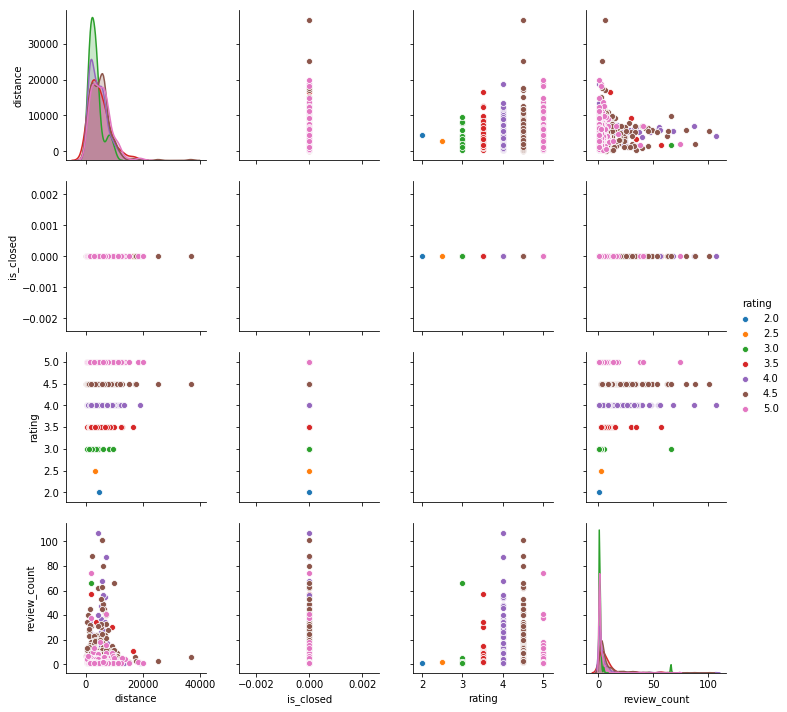

In [17]:
sns.pairplot(df, hue="rating")

In [18]:
df.isna().sum()

alias              0
categories         0
coordinates        0
display_phone      0
distance           0
id                 0
image_url          0
is_closed          0
location           0
name               0
phone              0
price            392
rating             0
review_count       0
transactions       0
url                0
dtype: int64

In [19]:
df["price"].isna().sum()

392

In [20]:
print(f'% of null values: {(df["price"].isna().sum())/(len(df["price"]))}')

% of null values: 0.392


`price` has around 40% of its values as null...let's make the assumption that coffee shops that did not provide a pricing level are actually the lowest pricing level, as more distinguished places would have indicated this information.

In [21]:
print(df.price.nunique())
print(df.price.value_counts())

3
￥      432
￥￥     155
￥￥￥     21
Name: price, dtype: int64


In [22]:
df["price"] = df["price"].fillna(value=1)

In [23]:
#changing the yen to numeric categories
price_dict = {"￥": 1, "￥￥":2, "￥￥￥": 3}
df.price = df.price.map(price_dict)

In [24]:
df["price"].value_counts()

1.0    432
2.0    155
3.0     21
Name: price, dtype: int64

In [25]:
# change to numeric data
df[["rating", "review_count"]] = df[["rating", "review_count"]].apply(pd.to_numeric)

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, *

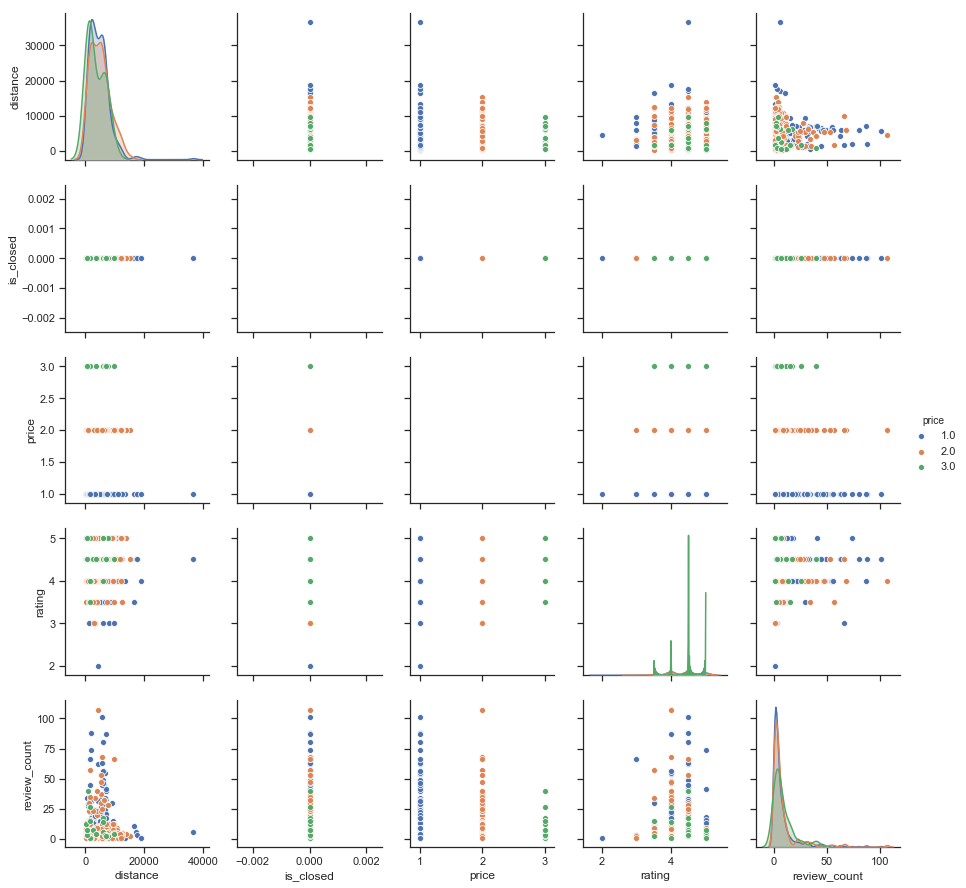

In [26]:
sns.set(style="ticks")
sns.pairplot(df, hue="price")

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


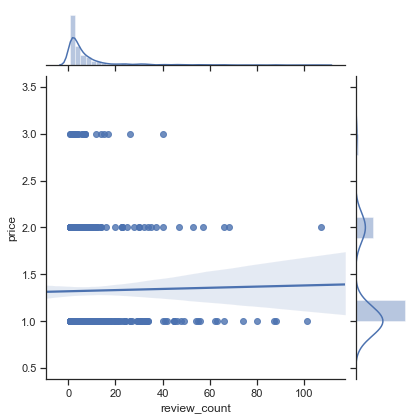

In [27]:
sns.jointplot(x="review_count", y="price", data=df, kind="reg")

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


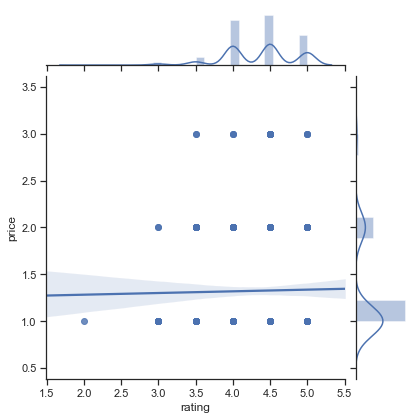

In [28]:
sns.jointplot(x="rating", y="price", data=df, kind="reg")

In [29]:
df.corr()

,distance,is_closed,price,rating,review_count
distance,1.000000,NaN,-0.006179,0.124921,-0.016891
is_closed,NaN,NaN,NaN,NaN,NaN
price,-0.006179,NaN,1.000000,0.016012,0.015822
rating,0.124921,NaN,0.016012,1.000000,-0.082013
review_count,-0.016891,NaN,0.015822,-0.082013,1.000000


Not much to interpret here, but one observation to make is that `rating` and `review_count` are weakly and inversely correlated at -8.6%.

## Mapping

Look at the initial Yelp example and try and make a map using Folium of the restaurants you retrieved. Be sure to also add popups to the markers giving some basic information such as name, rating and price.

In [31]:
df['coordinates']

0       {'latitude': 35.668022, 'longitude': 139.771975}
1      {'latitude': 35.7014961242676, 'longitude': 13...
2      {'latitude': 35.6937705070031, 'longitude': 13...
3       {'latitude': 35.715242, 'longitude': 139.795394}
4        {'latitude': 35.69877, 'longitude': 139.774854}
5      {'latitude': 35.6711780398366, 'longitude': 13...
6       {'latitude': 35.665583, 'longitude': 139.704759}
7       {'latitude': 35.667975, 'longitude': 139.762328}
8        {'latitude': 35.711403, 'longitude': 139.79396}
9       {'latitude': 35.689753, 'longitude': 139.773494}
10      {'latitude': 35.711762, 'longitude': 139.777928}
11     {'latitude': 35.6815101, 'longitude': 139.768882}
12     {'latitude': 35.7026972, 'longitude': 139.797862}
13     {'latitude': 35.6918654, 'longitude': 139.7031...
14      {'latitude': 35.671934, 'longitude': 139.737705}
15      {'latitude': 35.697452, 'longitude': 139.754684}
16      {'latitude': 35.668408, 'longitude': 139.710777}
17     {'latitude': 35.69779156

In [32]:
#Your code here
import folium

#to extract the lat and long from coordinates:
lat_long = df['coordinates'].iloc[0]
lat = lat_long['latitude']
long = lat_long['longitude']

tokyocoffee_yelp_map = folium.Map([lat, long])

for row in df.index:
    try:
        lat_long = df['coordinates'][row]
        lat = lat_long['latitude']
        long = lat_long['longitude']
        name = df['name'][row]
        rating = df['rating'][row]
        review_count = df['review_count'][row]
        price = df['price'][row]
        details = "{}\nPrice: {} Rating: {} Review_Count: {}".format(name, str(price), str(rating), str(review_count))
        popup = folium.Popup(details, parse_html=True)
        marker = folium.Marker([lat, long], popup=popup)
        marker.add_to(tokyocoffee_yelp_map)
    except:
        print('Hit error in row: {}'.format(row))
tokyocoffee_yelp_map        

## Summary

Nice work! In this lab, you synthesized your skills for the day, making multiple API calls to Yelp in order to paginate through a results set, performing some basic exploratory analysis and then creating a nice map visual to display the results! Well done!